Task 4 : Image Reconstruction using Matrix Factorisation [4 Marks]
Use the instructor's notebook on matrix factorisation, and solve the following questions. Here, ground truth pixel values are missing for particular regions within the image- you don't have access to them.

Pick an image of your liking and reconstruct it using matrix factorization. Choose a suitable value for the rank
r
. Run Gradient Descent until it converges, plot the reconstructed image alongside the original image. Calculate and report the RMSE and PSNR metrics.

Processing channel 0 for r = 1
Converged at epoch 20
Finished channel 0 for r = 1
Processing channel 1 for r = 1
Converged at epoch 21
Finished channel 1 for r = 1
Processing channel 2 for r = 1
Converged at epoch 22
Finished channel 2 for r = 1
Results for r = 1:
RMSE: 0.25451830313159696
PSNR: 11.885619617174584


Processing channel 0 for r = 2
Converged at epoch 55
Finished channel 0 for r = 2
Processing channel 1 for r = 2
Converged at epoch 77
Finished channel 1 for r = 2
Processing channel 2 for r = 2
Converged at epoch 126
Finished channel 2 for r = 2
Results for r = 2:
RMSE: 0.20777970180655136
PSNR: 13.647937626816995


Processing channel 0 for r = 3
Converged at epoch 213
Finished channel 0 for r = 3
Processing channel 1 for r = 3
Converged at epoch 280
Finished channel 1 for r = 3
Processing channel 2 for r = 3
Converged at epoch 266
Finished channel 2 for r = 3
Results for r = 3:
RMSE: 0.1849469711455751
PSNR: 14.659055533582649


Processing channel 0 for r = 4
Converged at

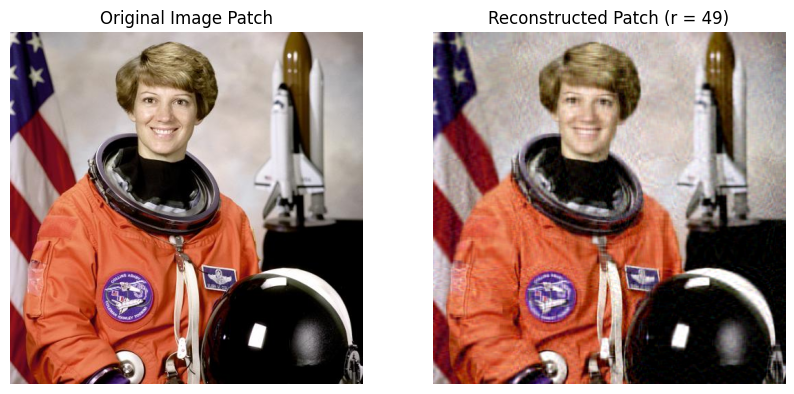

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float
import cv2

# Function to compute the gradient descent updates for each color channel
def gradient_descent(U, V, image_patch, lr=0.001, epochs=1000, tol=1e-6):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        # Compute the gradient for each color channel
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U_grad = U_grad + 1e-8
        V_grad = V_grad + 1e-8

        # Update U and V
        U -= lr * U_grad
        V -= lr * V_grad

        #  Compute new RMSE to check convergence
        current_error = np.sqrt(np.mean(error ** 2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error

    return U, V

# Function to compress the image patch using matrix factorization for each channel
def compress_image_patch(image_patch, r, lr=0.001, epochs=1000):
    N, M, C = image_patch.shape
    # Initialize U and V with random values for each channel
    reconstructed_patch = np.zeros_like(image_patch)
    for c in range(C):

        print(f"Processing channel {c} for r = {r}")
        U = np.random.randn(N, r)*0.1
        V = np.random.randn(r, M)*0.1

        # Apply gradient descent to learn U and V for each channel
        U, V = gradient_descent(U, V, image_patch[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the image patch for each channel
        reconstructed_patch[:, :, c] = np.dot(U, V)
        print(f"Finished channel {c} for r = {r}")
    reconstructed_patch = np.clip(reconstructed_patch, 0, 1)
    return reconstructed_patch


# Function to compute RMSE for each channel
def compute_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Function to compute PSNR for each channel
def compute_psnr(original, reconstructed):
    return psnr(original, reconstructed, data_range=original.max() - original.min())

# Function to display the original and reconstructed image patches
def display_images(original, reconstructed, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original Image Patch')
    axes[0].axis('off')

    axes[1].imshow(reconstructed)
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.show()

# Load image
image_path = 'hxzrz.jpg'
image = img_as_float(io.imread(image_path))

new_width = 512
new_height = 512
image = cv2.resize(image, (new_width, new_height))

# Check if the image is RGBA
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Discard the alpha channel

# Ensure the image is RGB
if image.shape[-1] != 3:
    raise ValueError("Extracted patch is not RGB. Check the slicing.")



# Define a range of ranks to test
r_values = range(1,50)

best_r = None
best_rmse = float('inf')
best_psnr = float('-inf')
best_reconstructed_image = None

# Loop through each rank value
for r in r_values:
    # Compress and reconstruct the image patch
    reconstructed_patch = compress_image_patch(image, r)

    # Compute RMSE and PSNR
    rmse_value = compute_rmse(image, reconstructed_patch)
    psnr_value = compute_psnr(image, reconstructed_patch)

    # Update the best rank if current RMSE is lower
    if rmse_value < best_rmse:
        best_rmse = rmse_value
        best_psnr = psnr_value
        best_r = r
        best_reconstructed_image = reconstructed_patch

    print(f"Results for r = {r}:")
    print(f"RMSE: {rmse_value}")
    print(f"PSNR: {psnr_value}")
    print("\n")

# Display results for the best rank
print(f"Optimal r = {best_r}:")
print(f"Best RMSE: {best_rmse}")
print(f"Best PSNR: {best_psnr}")

# Display original and reconstructed images for the best rank
display_images(image, best_reconstructed_image, f"Reconstructed Patch (r = {best_r})")

with r=100

Processing channel 0 for r = 1
Converged at epoch 22
Finished channel 0 for r = 1
Processing channel 1 for r = 1
Converged at epoch 25
Finished channel 1 for r = 1
Processing channel 2 for r = 1
Converged at epoch 32
Finished channel 2 for r = 1
Results for r = 1:
RMSE: 0.2545183429016043
PSNR: 11.885618259952475


Processing channel 0 for r = 2
Converged at epoch 53
Finished channel 0 for r = 2
Processing channel 1 for r = 2
Converged at epoch 89
Finished channel 1 for r = 2
Processing channel 2 for r = 2
Converged at epoch 216
Finished channel 2 for r = 2
Results for r = 2:
RMSE: 0.20777917896091916
PSNR: 13.647959483548588


Processing channel 0 for r = 3
Converged at epoch 188
Finished channel 0 for r = 3
Processing channel 1 for r = 3
Converged at epoch 127
Finished channel 1 for r = 3
Processing channel 2 for r = 3
Converged at epoch 188
Finished channel 2 for r = 3
Results for r = 3:
RMSE: 0.18489643804404304
PSNR: 14.661429105396026


Processing channel 0 for r = 4
Converged at

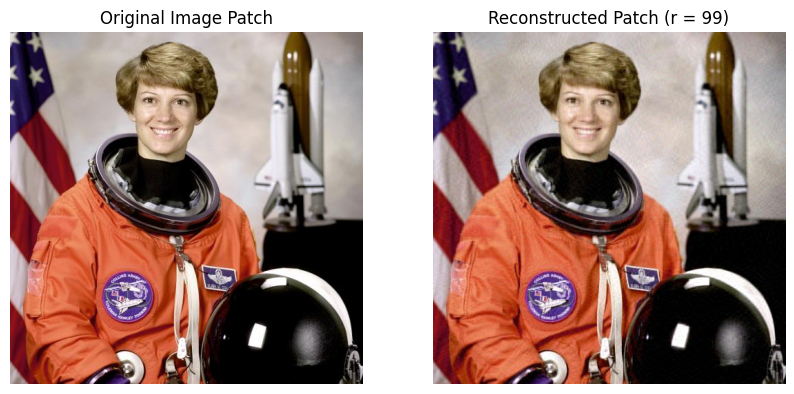

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float
import cv2

# Function to compute the gradient descent updates for each color channel
def gradient_descent(U, V, image_patch, lr=0.001, epochs=1000, tol=1e-6):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        # Compute the gradient for each color channel
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U_grad = U_grad + 1e-8
        V_grad = V_grad + 1e-8

        # Update U and V
        U -= lr * U_grad
        V -= lr * V_grad

        #  Compute new RMSE to check convergence
        current_error = np.sqrt(np.mean(error ** 2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error

    return U, V

# Function to compress the image patch using matrix factorization for each channel
def compress_image_patch(image_patch, r, lr=0.001, epochs=1000):
    N, M, C = image_patch.shape
    # Initialize U and V with random values for each channel
    reconstructed_patch = np.zeros_like(image_patch)
    for c in range(C):

        print(f"Processing channel {c} for r = {r}")
        U = np.random.randn(N, r)*0.1
        V = np.random.randn(r, M)*0.1

        # Apply gradient descent to learn U and V for each channel
        U, V = gradient_descent(U, V, image_patch[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the image patch for each channel
        reconstructed_patch[:, :, c] = np.dot(U, V)
        print(f"Finished channel {c} for r = {r}")
    reconstructed_patch = np.clip(reconstructed_patch, 0, 1)
    return reconstructed_patch


# Function to compute RMSE for each channel
def compute_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Function to compute PSNR for each channel
def compute_psnr(original, reconstructed):
    return psnr(original, reconstructed, data_range=original.max() - original.min())

# Function to display the original and reconstructed image patches
def display_images(original, reconstructed, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original Image Patch')
    axes[0].axis('off')

    axes[1].imshow(reconstructed)
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.show()

# Load image
image_path = 'hxzrz.jpg'
image = img_as_float(io.imread(image_path))

new_width = 512
new_height = 512
image = cv2.resize(image, (new_width, new_height))

# Check if the image is RGBA
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Discard the alpha channel

# Ensure the image is RGB
if image.shape[-1] != 3:
    raise ValueError("Extracted patch is not RGB. Check the slicing.")



# Define a range of ranks to test
r_values = range(1,100)

best_r = None
best_rmse = float('inf')
best_psnr = float('-inf')
best_reconstructed_image = None

# Loop through each rank value
for r in r_values:
    # Compress and reconstruct the image patch
    reconstructed_patch = compress_image_patch(image, r)

    # Compute RMSE and PSNR
    rmse_value = compute_rmse(image, reconstructed_patch)
    psnr_value = compute_psnr(image, reconstructed_patch)

    # Update the best rank if current RMSE is lower
    if rmse_value < best_rmse:
        best_rmse = rmse_value
        best_psnr = psnr_value
        best_r = r
        best_reconstructed_image = reconstructed_patch

    print(f"Results for r = {r}:")
    print(f"RMSE: {rmse_value}")
    print(f"PSNR: {psnr_value}")
    print("\n")

# Display results for the best rank
print(f"Optimal r = {best_r}:")
print(f"Best RMSE: {best_rmse}")
print(f"Best PSNR: {best_psnr}")

# Display original and reconstructed images for the best rank
display_images(image, best_reconstructed_image, f"Reconstructed Patch (r = {best_r})")

average rmse and psnr for differnt values of r for getting desired r

Processing channel 0 for r = 1
Converged at epoch 22
Finished channel 0 for r = 1
Processing channel 1 for r = 1
Converged at epoch 25
Finished channel 1 for r = 1
Processing channel 2 for r = 1
Converged at epoch 32
Finished channel 2 for r = 1
Results for r = 1:
RMSE: 0.2545183429016043
PSNR: 11.885618259952475


Processing channel 0 for r = 2
Converged at epoch 53
Finished channel 0 for r = 2
Processing channel 1 for r = 2
Converged at epoch 89
Finished channel 1 for r = 2
Processing channel 2 for r = 2
Converged at epoch 216
Finished channel 2 for r = 2
Results for r = 2:
RMSE: 0.20777917896091916
PSNR: 13.647959483548588


Processing channel 0 for r = 3
Converged at epoch 188
Finished channel 0 for r = 3
Processing channel 1 for r = 3
Converged at epoch 127
Finished channel 1 for r = 3
Processing channel 2 for r = 3
Converged at epoch 188
Finished channel 2 for r = 3
Results for r = 3:
RMSE: 0.18489643804404304
PSNR: 14.661429105396026


Processing channel 0 for r = 4
Converged at

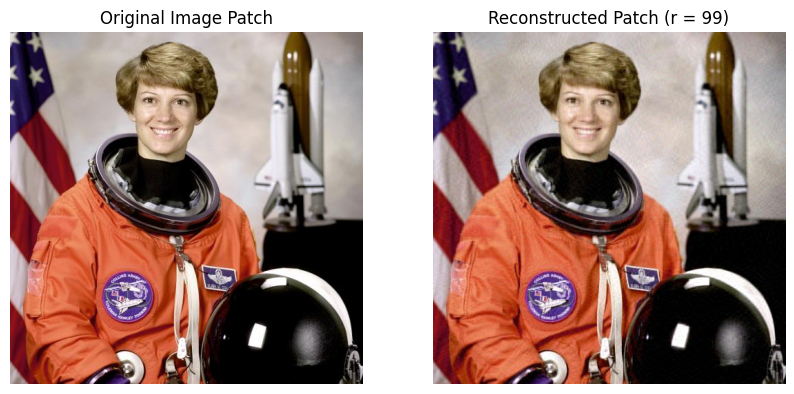

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float
import cv2

# Function to compute the gradient descent updates for each color channel
def gradient_descent(U, V, image_patch, lr=0.001, epochs=1000, tol=1e-6):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        # Compute the gradient for each color channel
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U_grad = U_grad + 1e-8
        V_grad = V_grad + 1e-8

        # Update U and V
        U -= lr * U_grad
        V -= lr * V_grad

        #  Compute new RMSE to check convergence
        current_error = np.sqrt(np.mean(error ** 2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error

    return U, V

# Function to compress the image patch using matrix factorization for each channel
def compress_image_patch(image_patch, r, lr=0.001, epochs=1000):
    N, M, C = image_patch.shape
    # Initialize U and V with random values for each channel
    reconstructed_patch = np.zeros_like(image_patch)
    for c in range(C):

        print(f"Processing channel {c} for r = {r}")
        U = np.random.randn(N, r)*0.1
        V = np.random.randn(r, M)*0.1

        # Apply gradient descent to learn U and V for each channel
        U, V = gradient_descent(U, V, image_patch[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the image patch for each channel
        reconstructed_patch[:, :, c] = np.dot(U, V)
        print(f"Finished channel {c} for r = {r}")
    reconstructed_patch = np.clip(reconstructed_patch, 0, 1)
    return reconstructed_patch


# Function to compute RMSE for each channel
def compute_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Function to compute PSNR for each channel
def compute_psnr(original, reconstructed):
    return psnr(original, reconstructed, data_range=original.max() - original.min())

# Function to display the original and reconstructed image patches
def display_images(original, reconstructed, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original Image Patch')
    axes[0].axis('off')

    axes[1].imshow(reconstructed)
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.show()

# Load image
image_path = 'hxzrz.jpg'
image = img_as_float(io.imread(image_path))

new_width = 512
new_height = 512
image = cv2.resize(image, (new_width, new_height))

# Check if the image is RGBA
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Discard the alpha channel

# Ensure the image is RGB
if image.shape[-1] != 3:
    raise ValueError("Extracted patch is not RGB. Check the slicing.")



# Define a range of ranks to test
r_values = [5.10,20,25,50,75,100,200]
results = {}

# Loop through each rank value
for r in r_values:
    rmse_values = []
    psnr_values = []

    # Multiple runs for each rank to average out random initialization effects
    for _ in range(5):  # You can adjust the number of runs
        # Compress and reconstruct the image patch
        reconstructed_patch = compress_image_patch(image, r)

        # Compute RMSE and PSNR
        rmse_value = compute_rmse(image, reconstructed_patch)
        psnr_value = compute_psnr(image, reconstructed_patch)

        rmse_values.append(rmse_value)
        psnr_values.append(psnr_value)

    # Calculate average RMSE and PSNR for the current rank
    avg_rmse = np.mean(rmse_values)
    avg_psnr = np.mean(psnr_values)

    results[r] = {'rmse': avg_rmse, 'psnr': avg_psnr}

    print(f"Results for r = {r}:")
    print(f"Average RMSE: {avg_rmse}")
    print(f"Average PSNR: {avg_psnr}")
    print("\n")

# Print the results in a tabular format
print("Rank | Average RMSE | Average PSNR")
print("------------------------------------")
for r, values in results.items():
    print(f"{r:4d} | {values['rmse']:12.4f} | {values['psnr']:12.4f}")


RMSE V/S r, PSNR v/s r curve upto r=50

Processing channel 0 for r = 1
Converged at epoch 18
Finished channel 0 for r = 1
Processing channel 1 for r = 1
Converged at epoch 26
Finished channel 1 for r = 1
Processing channel 2 for r = 1
Converged at epoch 25
Finished channel 2 for r = 1
Processing channel 0 for r = 2
Converged at epoch 61
Finished channel 0 for r = 2
Processing channel 1 for r = 2
Converged at epoch 110
Finished channel 1 for r = 2
Processing channel 2 for r = 2
Converged at epoch 119
Finished channel 2 for r = 2
Processing channel 0 for r = 3
Converged at epoch 95
Finished channel 0 for r = 3
Processing channel 1 for r = 3
Converged at epoch 200
Finished channel 1 for r = 3
Processing channel 2 for r = 3
Converged at epoch 183
Finished channel 2 for r = 3
Processing channel 0 for r = 4
Converged at epoch 496
Finished channel 0 for r = 4
Processing channel 1 for r = 4
Converged at epoch 202
Finished channel 1 for r = 4
Processing channel 2 for r = 4
Converged at epoch 701
Finished channel 2 for r = 4
Processin

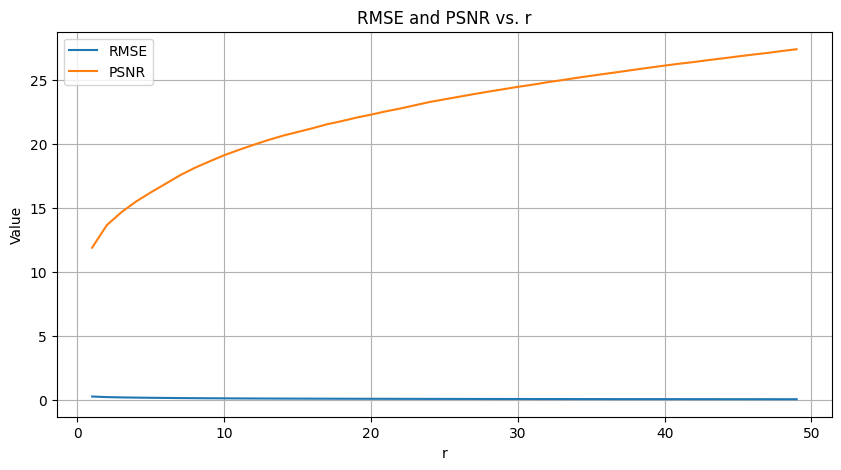

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float
import cv2

# Function to compute the gradient descent updates for each color channel
def gradient_descent(U, V, image_patch, lr=0.001, epochs=1000, tol=1e-6):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        # Compute the gradient for each color channel
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U_grad = U_grad + 1e-8
        V_grad = V_grad + 1e-8

        # Update U and V
        U -= lr * U_grad
        V -= lr * V_grad

        #  Compute new RMSE to check convergence
        current_error = np.sqrt(np.mean(error ** 2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error

    return U, V

# Function to compress the image patch using matrix factorization for each channel
def compress_image_patch(image_patch, r, lr=0.001, epochs=1000):
    N, M, C = image_patch.shape
    # Initialize U and V with random values for each channel
    reconstructed_patch = np.zeros_like(image_patch)
    for c in range(C):

        print(f"Processing channel {c} for r = {r}")
        U = np.random.randn(N, r)*0.1
        V = np.random.randn(r, M)*0.1

        # Apply gradient descent to learn U and V for each channel
        U, V = gradient_descent(U, V, image_patch[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the image patch for each channel
        reconstructed_patch[:, :, c] = np.dot(U, V)
        print(f"Finished channel {c} for r = {r}")
    reconstructed_patch = np.clip(reconstructed_patch, 0, 1)
    return reconstructed_patch


# Function to compute RMSE for each channel
def compute_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Function to compute PSNR for each channel
def compute_psnr(original, reconstructed):
    return psnr(original, reconstructed, data_range=original.max() - original.min())

# Function to display the original and reconstructed image patches
# Load image
image_path = 'hxzrz.jpg'
image = img_as_float(io.imread(image_path))

new_width = 512
new_height = 512
image = cv2.resize(image, (new_width, new_height))

# Check if the image is RGBA
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Discard the alpha channel

# Ensure the image is RGB
if image.shape[-1] != 3:
    raise ValueError("Extracted patch is not RGB. Check the slicing.")

# Define a range of ranks to test
r_values = range(1,50)

rmse_values = []
psnr_values = []

# Loop through each rank value
for r in r_values:
    # Compress and reconstruct the image patch
    reconstructed_patch = compress_image_patch(image, r)

    # Compute RMSE and PSNR
    rmse_value = compute_rmse(image, reconstructed_patch)
    psnr_value = compute_psnr(image, reconstructed_patch)

    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

# Plot the RMSE and PSNR values against r
plt.figure(figsize=(10, 5))
plt.plot(r_values, rmse_values, label='RMSE')
plt.plot(r_values, psnr_values, label='PSNR')
plt.xlabel('r')
plt.ylabel('Value')
plt.title('RMSE and PSNR vs. r')
plt.legend()
plt.grid(True)
plt.show()

curve with r value upto 200

Converged at epoch 18
Converged at epoch 25
Converged at epoch 25
Converged at epoch 62
Converged at epoch 95
Converged at epoch 185
Converged at epoch 143
Converged at epoch 183
Converged at epoch 155
Converged at epoch 315
Converged at epoch 178
Converged at epoch 353
Converged at epoch 168
Converged at epoch 201
Converged at epoch 213
Converged at epoch 229
Converged at epoch 219
Converged at epoch 347
Converged at epoch 421
Converged at epoch 259
Converged at epoch 391
Converged at epoch 268
Converged at epoch 294
Converged at epoch 308
Converged at epoch 284
Converged at epoch 392
Converged at epoch 324
Converged at epoch 521
Converged at epoch 325
Converged at epoch 367
Converged at epoch 345
Converged at epoch 550
Converged at epoch 307
Converged at epoch 513
Converged at epoch 489
Converged at epoch 487
Converged at epoch 358
Converged at epoch 335
Converged at epoch 441
Converged at epoch 310
Converged at epoch 501
Converged at epoch 577
Converged at epoch 521
Converged at epo

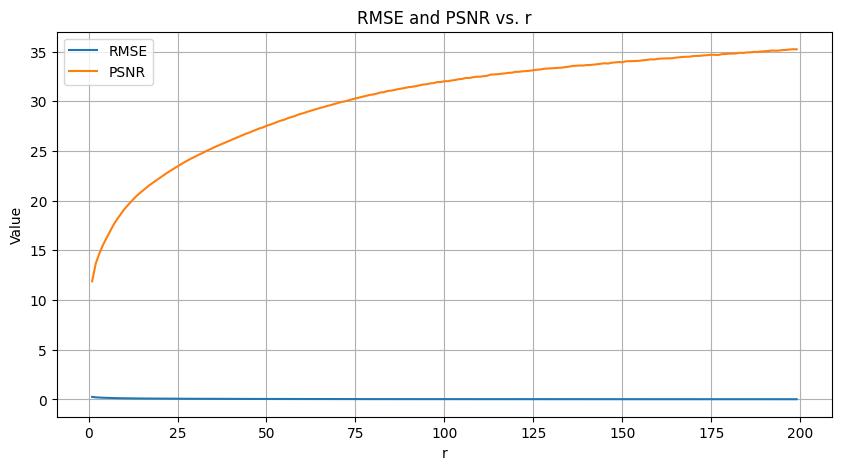

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float
import cv2

# Function to compute the gradient descent updates for each color channel
def gradient_descent(U, V, image_patch, lr=0.001, epochs=1000, tol=1e-6):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        # Compute the gradient for each color channel
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U_grad = U_grad + 1e-8
        V_grad = V_grad + 1e-8

        # Update U and V
        U -= lr * U_grad
        V -= lr * V_grad

        #  Compute new RMSE to check convergence
        current_error = np.sqrt(np.mean(error ** 2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error

    return U, V

# Function to compress the image patch using matrix factorization for each channel
def compress_image_patch(image_patch, r, lr=0.001, epochs=1000):
    N, M, C = image_patch.shape
    # Initialize U and V with random values for each channel
    reconstructed_patch = np.zeros_like(image_patch)
    for c in range(C):

       # print(f"Processing channel {c} for r = {r}")
        U = np.random.randn(N, r)*0.1
        V = np.random.randn(r, M)*0.1

        # Apply gradient descent to learn U and V for each channel
        U, V = gradient_descent(U, V, image_patch[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the image patch for each channel
        reconstructed_patch[:, :, c] = np.dot(U, V)
        #print(f"Finished channel {c} for r = {r}")
    reconstructed_patch = np.clip(reconstructed_patch, 0, 1)
    return reconstructed_patch


# Function to compute RMSE for each channel
def compute_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Function to compute PSNR for each channel
def compute_psnr(original, reconstructed):
    return psnr(original, reconstructed, data_range=original.max() - original.min())

# Function to display the original and reconstructed image patches
def display_images(original, reconstructed, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original Image Patch')
    axes[0].axis('off')

    axes[1].imshow(reconstructed)
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.show()

# Load image
image_path = 'hxzrz.jpg'
image = img_as_float(io.imread(image_path))

new_width = 512
new_height = 512
image = cv2.resize(image, (new_width, new_height))

# Check if the image is RGBA
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Discard the alpha channel

# Ensure the image is RGB
if image.shape[-1] != 3:
    raise ValueError("Extracted patch is not RGB. Check the slicing.")



# Define a range of ranks to test
r_values = range(1,200)
rmse_values = []
psnr_values = []

# Loop through each rank value
for r in r_values:
    # Compress and reconstruct the image patch
    reconstructed_patch = compress_image_patch(image, r)

    # Compute RMSE and PSNR
    rmse_value = compute_rmse(image, reconstructed_patch)
    psnr_value = compute_psnr(image, reconstructed_patch)

    rmse_values.append(rmse_value)
    psnr_values.append(psnr_value)

# Plot the RMSE and PSNR values against r
plt.figure(figsize=(10, 5))
plt.plot(r_values, rmse_values, label='RMSE')
plt.plot(r_values, psnr_values, label='PSNR')
plt.xlabel('r')
plt.ylabel('Value')
plt.title('RMSE and PSNR vs. r')
plt.legend()
plt.grid(True)
plt.show()

Consider a case where 900 pixels (30x30) are randomly missing from an image. Reconstruct the image using matrix factorization, plot the reconstructed image, and calculate the RMSE and PSNR metrics. Next, reconstruct the same image with the missing pixels using Random Fourier Features (RFF) and Linear Regression. Compute the RMSE and PSNR for both methods, and compare the results to see which performs better.[3 Marks]

other method


In [ ]:
!pip install opencv-python

USING MATRIX FACTORISATION

<ipython-input-6-bd0e2d3524b4>:60: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(original_img, reconstructed_img)


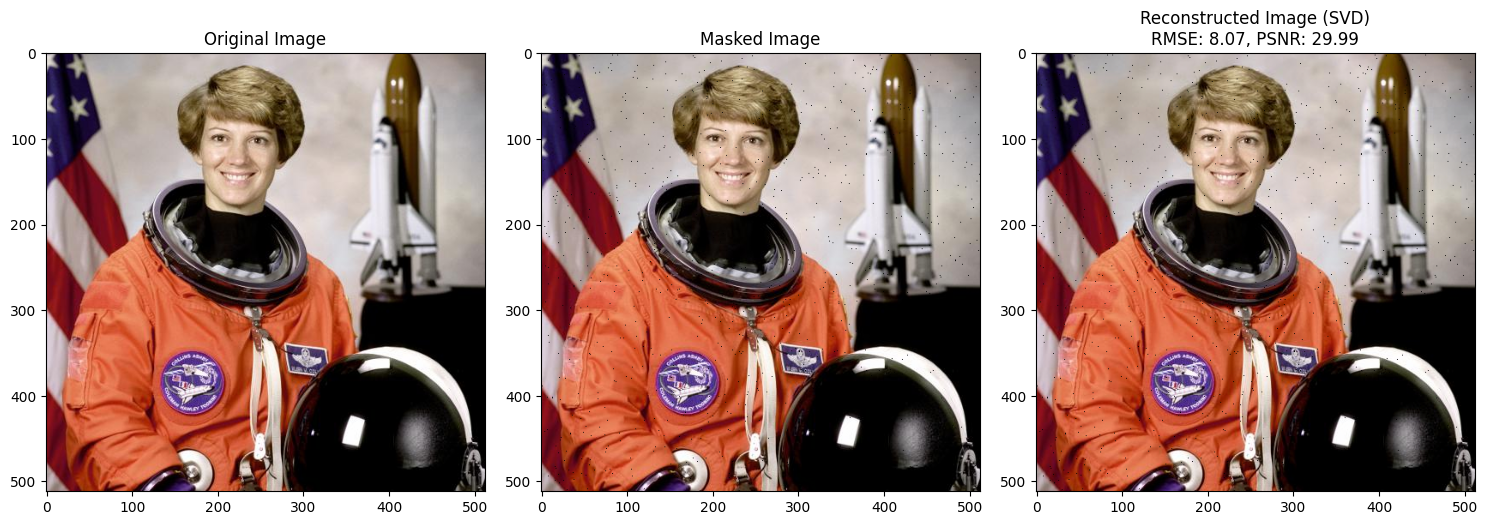

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

def enhanced_svd_reconstruction(masked_img, rank=100):
    """Reconstructs a masked image using SVD with mean and iterative refinement."""
    height, width, channels = masked_img.shape
    reconstructed_img = np.zeros_like(masked_img)
    for c in range(channels):
        # Calculate mean of the channel
        channel_mean = np.mean(masked_img[:, :, c])
        # Center the data
        centered_data = masked_img[:, :, c] - channel_mean
        U, S, VT = np.linalg.svd(centered_data, full_matrices=False)
        S = np.diag(S[:rank])
        reconstructed_channel = U[:, :rank].dot(S).dot(VT[:rank, :])
        # Add back the mean
        reconstructed_img[:, :, c] = reconstructed_channel + channel_mean

    # Iterative refinement (optional, adjust iterations and tolerance as needed)
    for _ in range(5):  # Example: 5 iterations
        for c in range(channels):
            error = masked_img[:, :, c] - reconstructed_img[:, :, c]
            U, S, VT = np.linalg.svd(error, full_matrices=False)
            S = np.diag(S[:rank])
            correction = U[:, :rank].dot(S).dot(VT[:rank, :])
            reconstructed_img[:, :, c] += correction

    return reconstructed_img

# Load the image (replace with your image path)
image_path = 'hxzrz.jpg'
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
height, width, channels = original_img.shape

# Add missing pixels
mask = np.ones((height, width), dtype=bool)
missing_pixels = 900  # Adjust the number of missing pixels as needed
missing_coords = np.random.choice(height * width, missing_pixels, replace=False)
mask[np.unravel_index(missing_coords, mask.shape)] = False
masked_img = original_img.copy()
masked_img[~mask] = 0

# Normalize pixel values to [0, 1]
masked_img = masked_img / 255.0

# Reconstruct using enhanced SVD with iterative refinement
reconstructed_img = enhanced_svd_reconstruction(masked_img)

# Denormalize the reconstructed image
reconstructed_img = reconstructed_img * 255.0

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_img.flatten(), reconstructed_img.flatten()))

# Calculate PSNR
psnr_value = psnr(original_img, reconstructed_img)

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(original_img)
axs[0].set_title("Original Image")
axs[1].imshow(masked_img)
axs[1].set_title("Masked Image")
axs[2].imshow(reconstructed_img.astype(np.uint8))
axs[2].set_title(f"Reconstructed Image (matrix factorisation SVD)\nRMSE: {rmse:.2f}, PSNR: {psnr_value:.2f}")
plt.tight_layout()
plt.show()

Converged at epoch 1
Converged at epoch 1
Converged at epoch 1


<ipython-input-3-b04e21c58251>:68: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(original_img, reconstructed_img)


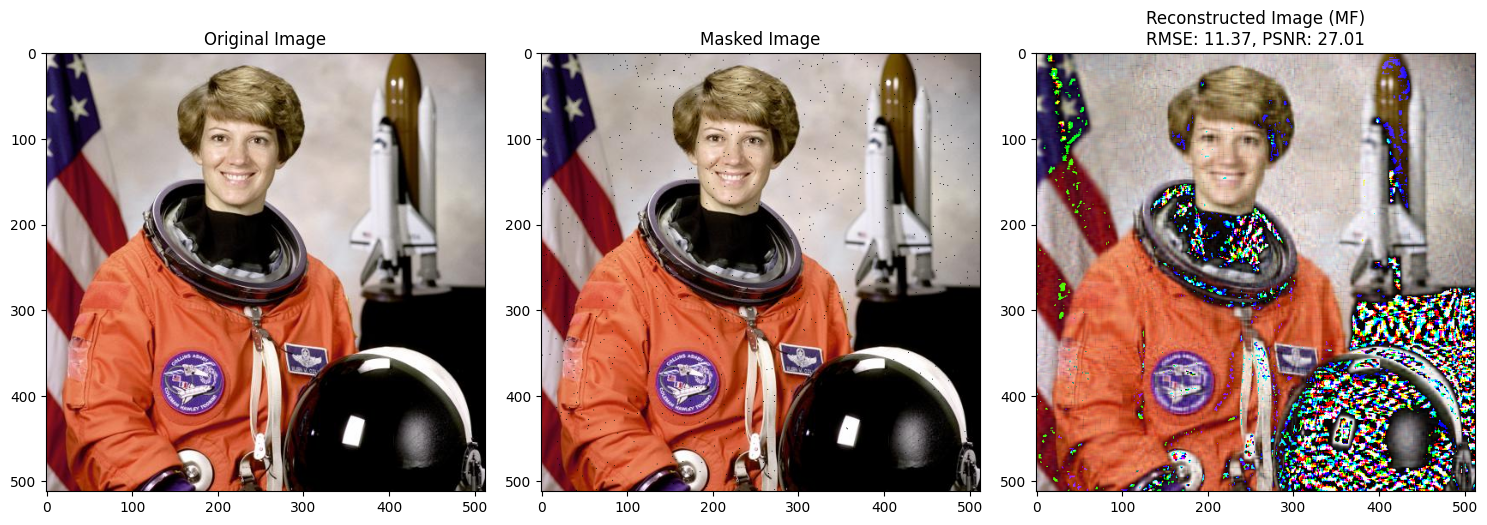

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

def gradient_descent(U, V, image_patch, lr=0.01, epochs=5000, tol=1e-8):
    N, M = image_patch.shape
    prev_error = float('inf')
    for epoch in range(epochs):
        error = image_patch - np.dot(U, V)
        U_grad = -2 * np.dot(error, V.T)
        V_grad = -2 * np.dot(U.T, error)

        U = U - lr * U_grad
        V = V - lr * V_grad

        current_error = np.sqrt(np.mean(error**2))
        if abs(prev_error - current_error) < tol:
            print(f"Converged at epoch {epoch}")
            break
        prev_error = current_error
    return U, V

def mf_reconstruction(masked_img, rank=50, lr=0.01, epochs=5000):
    height, width, channels = masked_img.shape
    reconstructed_img = np.zeros_like(masked_img)
    for c in range(channels):
        # Initialize U and V using SVD of the masked data
        U, S, VT = np.linalg.svd(masked_img[:, :, c], full_matrices=False)
        U = U[:, :rank] @ np.diag(np.sqrt(S[:rank]))
        VT = np.diag(np.sqrt(S[:rank])) @ VT[:rank, :]

        # Optimize U and V using gradient descent
        U, VT = gradient_descent(U, VT, masked_img[:, :, c], lr=lr, epochs=epochs)

        # Reconstruct the channel
        reconstructed_img[:, :, c] = U @ VT
    return reconstructed_img

# Load the image
image_path = 'hxzrz.jpg'
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
height, width, channels = original_img.shape

# Add missing pixels (adjust as needed)
mask = np.ones((height, width), dtype=bool)
missing_pixels = 900
missing_coords = np.random.choice(height * width, missing_pixels, replace=False)
mask[np.unravel_index(missing_coords, mask.shape)] = False
masked_img = original_img.copy()
masked_img[~mask] = 0

# Normalize pixel values to [0, 1]
masked_img = masked_img / 255.0

# Reconstruct using matrix factorization
reconstructed_img = mf_reconstruction(masked_img)

# Denormalize the reconstructed image
reconstructed_img = reconstructed_img * 255.0

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_img.flatten(), reconstructed_img.flatten()))

# Calculate PSNR
psnr_value = psnr(original_img, reconstructed_img)

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(original_img)
axs[0].set_title("Original Image")
axs[1].imshow(masked_img)
axs[1].set_title("Masked Image")
axs[2].imshow(reconstructed_img.astype(np.uint8))
axs[2].set_title(f"Reconstructed Image (MF)\nRMSE: {rmse:.2f}, PSNR: {psnr_value:.2f}")
plt.tight_layout()
plt.show()

RFF+ LINEAR REGRESSION

<ipython-input-8-3a1af1a6d69f>:55: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(original_img, reconstructed_img)


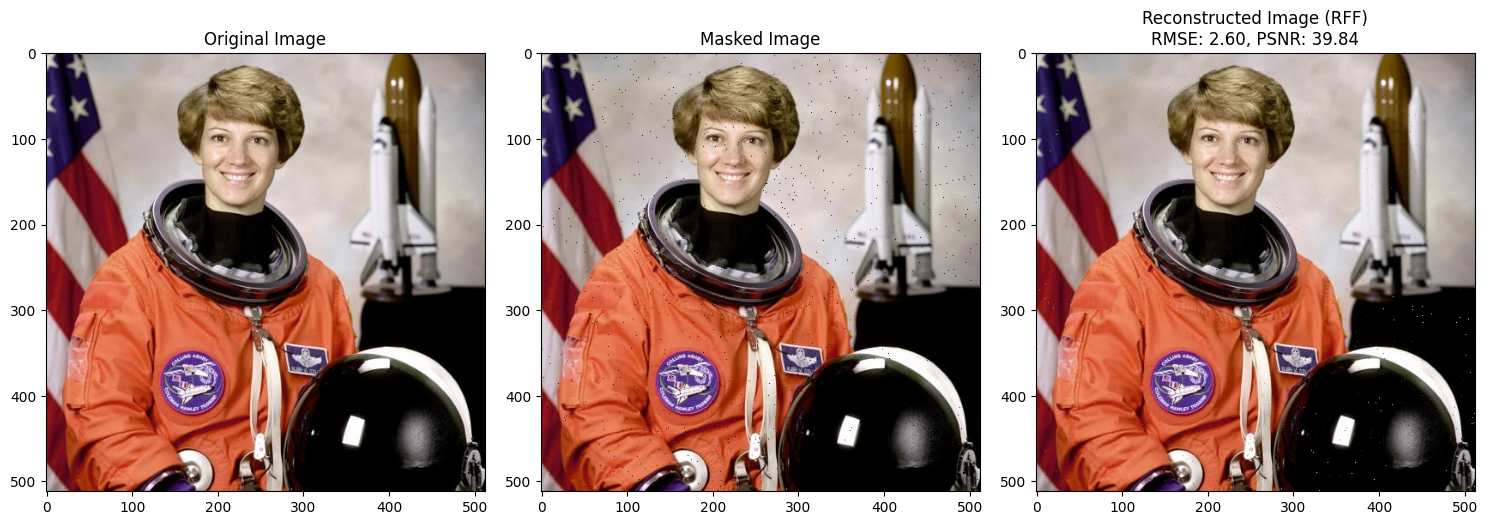

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
import cv2

def rff_reconstruction(masked_img, mask, gamma=1e-5, n_components=1000):
    """Reconstructs a masked image using RFF and linear regression."""
    coords = np.argwhere(mask)  # Get coordinates of available pixels
    missing_coords = np.argwhere(~mask)  # Get coordinates of missing pixels
    available_pixels = masked_img[mask].reshape(-1, 3)  # Get pixel values of available pixels

    rbf_feature = RBFSampler(gamma=gamma, n_components=n_components, random_state=42)
    X_train = rbf_feature.fit_transform(coords)
    X_missing = rbf_feature.transform(missing_coords)

    reconstructed_img = masked_img.copy()
    for channel in range(3):
        model = LinearRegression()
        model.fit(X_train, available_pixels[:, channel])
        predicted_pixels = model.predict(X_missing)
        reconstructed_img[~mask, channel] = predicted_pixels.reshape(-1)

    return reconstructed_img

# Load the image
image_path = 'hxzrz.jpg'
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
height, width, channels = original_img.shape

# Add missing pixels (adjust as needed)
mask = np.ones((height, width), dtype=bool)
missing_pixels = 900
missing_coords = np.random.choice(height * width, missing_pixels, replace=False)
mask[np.unravel_index(missing_coords, mask.shape)] = False
masked_img = original_img.copy()
masked_img[~mask] = 0

# Normalize pixel values to [0, 1]
masked_img = masked_img / 255.0

# Reconstruct using RFF and linear regression
reconstructed_img = rff_reconstruction(masked_img, mask)

# Denormalize the reconstructed image
reconstructed_img = reconstructed_img * 255.0

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_img.flatten(), reconstructed_img.flatten()))

# Calculate PSNR
psnr_value = psnr(original_img, reconstructed_img)

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(original_img)
axs[0].set_title("Original Image")
axs[1].imshow(masked_img)
axs[1].set_title("Masked Image")
axs[2].imshow(reconstructed_img.astype(np.uint8))
axs[2].set_title(f"Reconstructed Image (RFF)\nRMSE: {rmse:.2f}, PSNR: {psnr_value:.2f}")
plt.tight_layout()
plt.show()